# Лабораторная работа №7

## «Классификация с использованием Наивного байесовского классификатора»
## Выполнили студенты Зимин Андрей Валерьевич и Жилин Андрей Игоревич

### Импорт библиотек

In [77]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score as accuracy, f1_score as f1

# Часть 1. Рассмотрите задачу классификации на классическом примере набора «Ирисы» (4 балла). 

### Загрузка датасета

In [61]:
data_x = [(2.6, 1.0), (3.0, 2.3), (3.4, 1.6), (3.0, 1.5), (2.7, 1.0), (3.8, 2.0), (3.0, 1.8), (2.8, 2.1), (2.9, 1.3), (3.0, 1.8), (3.2, 1.5), (2.7, 1.8), (3.0, 1.4), (3.3, 2.5), (2.7, 1.9), (2.6, 1.2), (3.1, 1.4), (2.7, 1.9), (3.1, 2.4), (3.0, 1.5), (2.8, 1.4), (3.1, 1.5), (2.5, 1.8), (2.8, 1.3), (2.8, 1.8), (2.2, 1.5), (3.3, 2.5), (3.2, 1.8), (3.6, 2.5), (3.0, 1.7), (2.3, 1.3), (2.8, 1.3), (2.5, 1.5), (3.0, 2.1), (2.0, 1.0), (2.8, 2.2), (3.0, 1.6), (3.1, 2.1), (3.2, 2.3), (2.5, 1.7), (2.5, 1.1), (3.2, 2.3), (2.8, 1.2), (2.9, 1.5), (2.6, 1.4), (2.2, 1.0), (3.3, 2.1), (2.4, 1.1), (3.4, 2.4), (3.0, 1.2), (2.8, 1.5), (3.2, 1.4), (3.8, 2.2), (2.8, 2.4), (3.0, 1.8), (3.0, 1.5), (3.0, 1.4), (3.0, 2.1), (2.4, 1.0), (3.4, 2.3), (2.7, 1.4), (2.3, 1.0), (2.9, 1.3), (3.3, 1.6), (2.7, 1.3), (2.6, 1.2), (2.4, 1.0), (3.2, 2.0), (3.1, 1.5), (3.0, 1.8), (2.8, 1.9), (2.7, 1.9), (2.8, 1.5), (3.2, 1.8), (3.1, 1.8), (2.5, 1.1), (2.2, 1.5), (2.9, 1.4), (3.0, 2.1), (2.9, 1.3), (2.8, 2.0), (2.5, 2.0), (3.0, 2.2), (3.2, 2.3), (3.1, 2.3), (2.8, 1.3), (2.5, 1.9), (3.0, 2.3), (2.9, 1.3), (2.9, 1.8), (3.0, 2.0), (2.9, 1.8), (2.7, 1.2), (2.5, 1.3), (3.0, 1.3), (2.6, 2.3), (2.8, 2.0), (2.9, 1.3), (2.7, 1.6), (2.3, 1.3)]
data_y = [-1, 1, -1, -1, -1, 1, 1, 1, -1, 1, -1, 1, -1, 1, 1, -1, -1, 1, 1, -1, -1, -1, 1, -1, 1, -1, 1, -1, 1, -1, -1, -1, -1, 1, -1, 1, 1, 1, 1, 1, -1, 1, -1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 1, 1, -1, -1, 1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, -1, 1, 1, 1, -1, 1, 1, -1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1]

X = np.array(data_x)
y = np.array(data_y)

### Задание: Выделить обучающую выборку (70% всей выборки, случайное разделение реализовать самостоятельно) и отобразить в виде графика точек на плоскости (объекты разных классов должны быть иметь разные маркеры и цвет, сделавшим в классе +1 балл). 

In [62]:
def train_test_split(X, y, seed, alpha):
  split = None
  if X.shape[0] == y.shape[0]:
    np.random.seed(seed)
    split = np.random.random(size=len(y))

  y_train = y[split <= alpha]
  y_test  = y[split >  alpha]
  X_train = X[split <= alpha]
  X_test  = X[split >  alpha]

  return y_train, y_test, X_train, X_test

y_train, y_test, X_train, X_test = train_test_split(X, y, 10, alpha=0.7)

print("Обучающая выборка:")
print(y_train)
print()
print("Тестовая выборка:")
print(y_test)

Обучающая выборка:
[ 1 -1 -1  1  1 -1  1 -1 -1  1 -1  1 -1 -1  1 -1  1 -1  1 -1  1 -1 -1  1
 -1  1  1  1  1 -1 -1  1  1  1 -1  1 -1  1  1  1  1 -1 -1 -1 -1 -1 -1  1
 -1  1  1 -1  1  1 -1 -1  1  1  1  1  1 -1  1  1 -1  1  1  1 -1 -1  1 -1
 -1 -1]

Тестовая выборка:
[-1 -1  1  1  1 -1  1 -1 -1 -1  1  1 -1 -1 -1  1 -1 -1 -1 -1  1  1 -1  1
 -1  1]


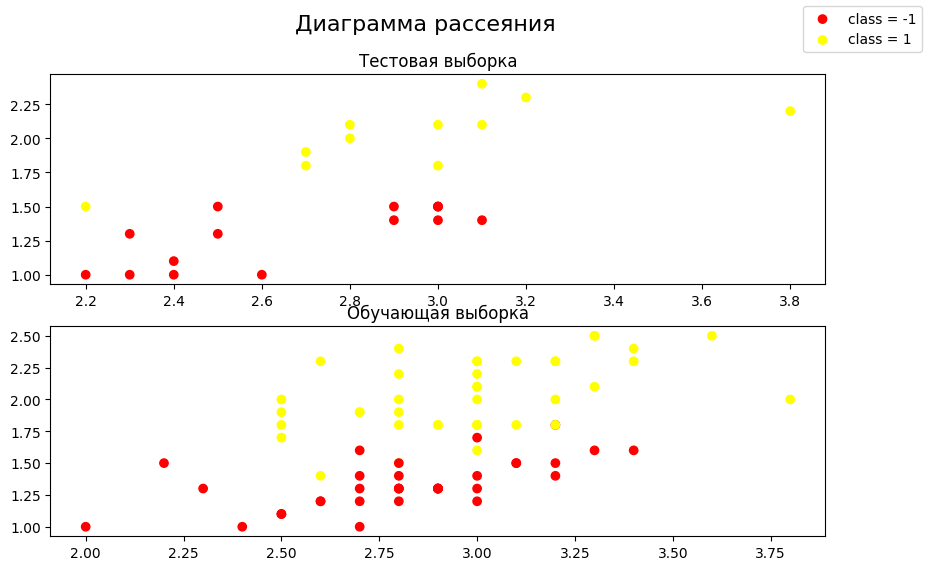

In [63]:
fig, ax = plt.subplots(2, 1, figsize=(10, 6))

ax[0].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap="autumn")
ax[0].set_title("Тестовая выборка")
ax[1].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="autumn")
ax[1].set_title("Обучающая выборка")
fig.suptitle('Диаграмма рассеяния', fontsize=16)
fig.legend(["class = -1", "class = 1"])

### Задание: Обучить модель. Отобразить тестовую выборку, чтобы было понятно качество классификации объектов из неё.

Так как наивный Байесовский классификатор работает с категориальными данными, нам нужно перевести неприрывные признаки в категориальные. Для этого разобъём их на бины. Судя по распределениям, разобъём признаки на 4 и 2 бина.

In [64]:
n = 2
number_bins = [4, 2]
len_bins = [0]*n

for i in range(n): 
    len_bins[i] = (max(X[:, i]) - min(X[:, i])) / number_bins[i]


Теперь закодируем float с помощью булевых масок

In [67]:
new_X = X.copy()

for i in range(n):
    for k in range(number_bins[i]):
        A = X[:, i] >= min(X[:, i])+k*len_bins[i]
        if k == number_bins[i]-1:
            B = X[:, i] <= min(X[:, i])+(k+1)*len_bins[i]
        else:
            B = X[:, i] < min(X[:, i])+(k+1)*len_bins[i]
        AB = np.all([A, B], axis=0)
        new_X = np.insert(new_X, new_X.shape[1], AB, axis=1)
print("Первые 5 значений получившихся признаков после преобразования")
new_X[:5, 2:]

Первые 5 значений получившихся признаков после преобразования


array([[0., 1., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 1.],
       [0., 0., 0., 1., 1., 0.],
       [0., 0., 1., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0.]])

Теперь нужно собрать из one-hot-encoding категории

In [68]:
F1 = np.argmax(new_X[:, [2, 3, 4, 5]], axis=-1)
F2 = np.argmax(new_X[:, [6, 7]], axis=-1) 
new_X = np.column_stack([F1, F2])
print("Категории первых 5 объектов")
new_X[:5, :]

Категории первых 5 объектов


array([[1, 0],
       [2, 1],
       [3, 0],
       [2, 0],
       [1, 0]])

In [69]:
print("метки классов первых 5 объектов")
y[:5]

метки классов первых 5 объектов


array([-1,  1, -1, -1, -1])

После этого ещё раз разбиваем наши данные

In [70]:
y_train, y_test, X_train, X_test = train_test_split(new_X, y, 10, alpha=0.7)

Посмотрим какие распределения получились

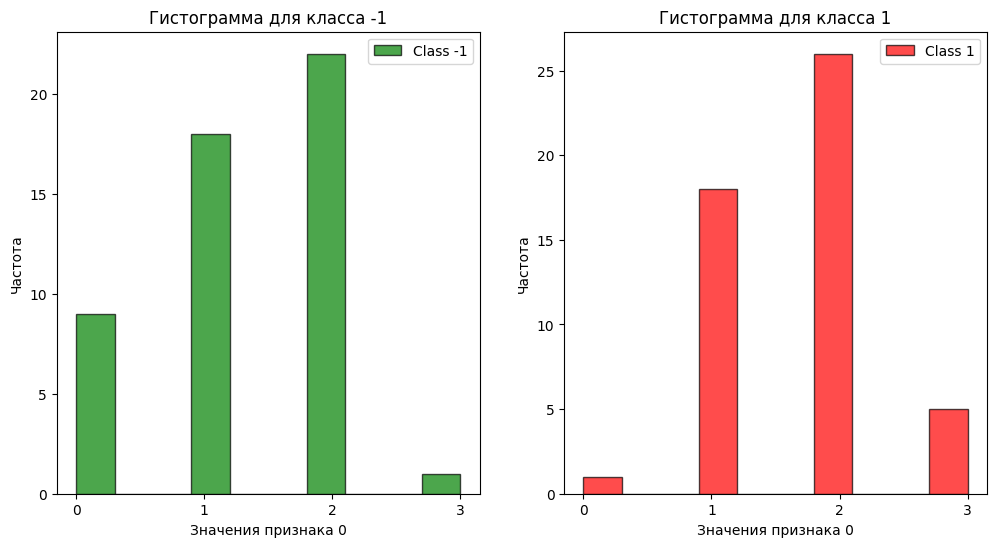

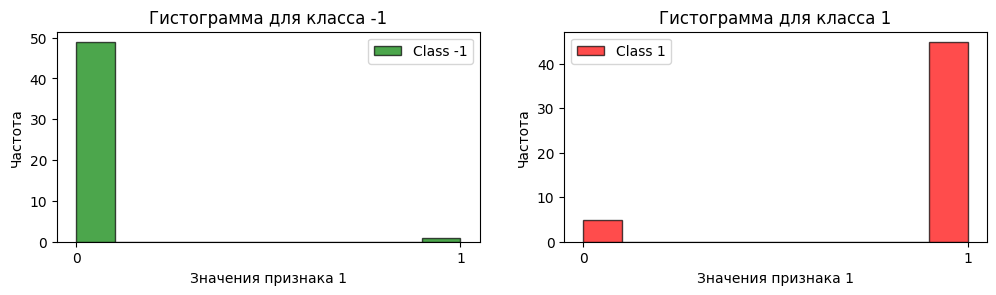

In [71]:
for i in range(n):
    class_neg = new_X[:, i][y == -1]
    class_pos = new_X[:, i][y == 1]

    plt.figure(figsize=(12, 6))

    plt.subplot(i+1, 2, 1)
    plt.hist(class_neg, alpha=0.7, color='green', edgecolor='black', label='Class -1')
    plt.title('Гистограмма для класса -1')
    plt.xlabel(f'Значения признака {i}')
    plt.ylabel('Частота')
    plt.xticks(np.unique(new_X[:, i]))
    plt.legend()

    plt.subplot(i+1, 2, 2)
    plt.hist(class_pos, alpha=0.7, color='red', edgecolor='black', label='Class 1')
    plt.title('Гистограмма для класса 1')
    plt.xlabel(f'Значения признака {i}')
    plt.ylabel('Частота')
    plt.xticks(np.unique(new_X[:, i]))
    plt.legend()

Формула Байеса имеет вид:
$$P(y_k|X_0,X_1,...,X_n)=\frac{P(y_k) \prod_{i=0}^n{P(X_i|y_k)} }{P(X_0,X_1,...,X_n)}$$

Где:  

$P(y_k|X_i)$ - апостериорная вероятность принадлежности объекта с набором признаков $X_0,X_1,...,X_n$ к классу $y_k$  
$P(y_k)$ - априорная вероятность принадлежности случайно выбранного объекта к классу $y_k$  
$P(X_i|y_k)$ - априорная вероятность того, что случайно выбранный объект класса $y_k$ обладает признаком $X_i$  
$P(X_0,X_1,...,X_n)$ - полная вероятность того, что случайно выбранный объект обладает набором признаков $X_0,X_1,...,X_n$  

In [75]:
class Bayes:
    classes = []
    classes_frequency = []
    number_of_classes = 0
    number_of_features = 0
    features_frequency = []
    total_values = 0

    def fit(self, X, y):
        # построение иерархической структуры частот
        self.classes, self.classes_frequency = np.unique_counts(y)
        self.number_of_classes = len(self.classes)
        self.total_values = X.shape[0]
        self.number_of_features = X.shape[1]
        self.features_frequency = [0]*self.number_of_features
        for feature in range(self.number_of_features):
            values, values_frequency = np.unique_counts(X[:, feature])
            values_frequency_in_classes = [0]*self.number_of_classes
            for c in range(self.number_of_classes):
                v, f = np.unique_counts(X[y == self.classes[c], feature])
                f = np.array(list(f) + [0]*(len(values) - len(v))) 
                values_frequency_in_classes[c] = f
            self.features_frequency[feature] = {"values":values, 
                                                "values_frequency":values_frequency, 
                                                "values_frequency_in_classes": values_frequency_in_classes}
    def P_y(self, k):
        # априорная вероятность принадлежности случайно выбранного объекта к классу y_k
        return self.classes_frequency[k] / self.total_values
    
    def P_Xy(self, i, k, value):
        # априорная вероятность того, что у случайно выбранного объекта класса y_k значение признака i == value
        index_of_value = np.where(self.features_frequency[i]["values"] == value)[0][0]
        return self.features_frequency[i]["values_frequency_in_classes"][k][index_of_value] / self.classes_frequency[k]

    def Composition_P_Xy(self, k, object):
        # произведение P_Xy по каждому признаку данного объекта
        composition = 1
        for i in range(self.number_of_features):
            composition *= self.P_Xy(i, k, object[i])
        return composition
    
    def P_full(self, object):
        # полная вероятность того, что случайно выбранный объект обладает набором признаков object[0], object[1], ..., object[n]
        composition = 1
        for i in range(self.number_of_features):
            index_of_value = np.where(self.features_frequency[i]["values"] == object[i])[0][0]
            composition *= self.features_frequency[i]["values_frequency"][index_of_value] / self.total_values
        return composition
    
    def P_yX(self, k, object):
        # апостериорная вероятность принадлежности объекта с набором признаков 
        # object[0], object[1], ..., object[n] к классу y_k 
        # но без знаменателя этой дроби
        result = self.P_y(k) * self.Composition_P_Xy(k, object) 
        return result
    
    def predict_one_object(self, object):
        # функция предсказания на одном объекте
        max_P = 0
        best_k = 0
        P = [0.0]*self.number_of_classes
        for k in range(self.number_of_classes):
            P[k] = self.P_yX(k, object)
            if P[k] > max_P:
                max_P = P[k]
                best_k = k
        return self.classes[best_k] 
    
    def predict(self, X):
        #print([self.predict_one_object(i) for i in X])
        return np.array([self.predict_one_object(i) for i in X])
        

model = Bayes()
model.fit(X_train, y_train)
print("Предсказанные метки классов для обучающей выборки")
predict_y_train = model.predict(X_train)
predict_y_train

Предсказанные метки классов для обучающей выборки


array([ 1, -1, -1, -1,  1, -1,  1, -1, -1,  1, -1,  1, -1, -1,  1, -1,  1,
       -1,  1,  1, -1, -1, -1,  1, -1,  1, -1,  1, -1, -1, -1, -1,  1, -1,
       -1, -1, -1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1,  1,
       -1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,
       -1, -1,  1, -1, -1, -1])

In [74]:
print("Предсказанные метки классов для тестовой выборки")
predict_y_test = model.predict(X_test)
predict_y_test

Предсказанные метки классов для тестовой выборки


array([-1, -1,  1,  1,  1, -1,  1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1, -1, -1,  1, -1,  1])

### Посчитаем метрики

In [82]:
def print_metrics(y_train, y_test, predict_y_train, predict_y_test):
    print("Обучающая выборка:")
    print(f"    accuracy: {accuracy(y_train, predict_y_train):.02f}")
    print(f"    f1:       {f1(y_train, predict_y_train):.02f}")
    print()
    print("Тестовая выборка:")
    print(f"    accuracy: {accuracy(y_test, predict_y_test):.02f}")
    print(f"    f1:       {f1(y_test, predict_y_test):.02f}")
print_metrics(y_train, y_test, predict_y_train, predict_y_test)

Обучающая выборка:
    accuracy: 0.88
    f1:       0.87

Тестовая выборка:
    accuracy: 0.92
    f1:       0.90
